Chapter 2 - Gaussian Bayesian Networks - graphical representation II

The crop data <br>
G = genetic potential <br>
E = environmental potential <br>
V = vegatative mass <br>
N = number of seeds (@ flowering time) <br>
W = average weight (later in plants life) <br>
C = crop 

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:bnlearn’:

    score


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘graph’


The following objects are masked from ‘package:bnlearn’:

    degree, nodes, nodes<-





  Random/Generated Bayesian network

  model:
   [E][G][V|E:G][N|V][W|V][C|N:W] 
  nodes:                                 6 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.67 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


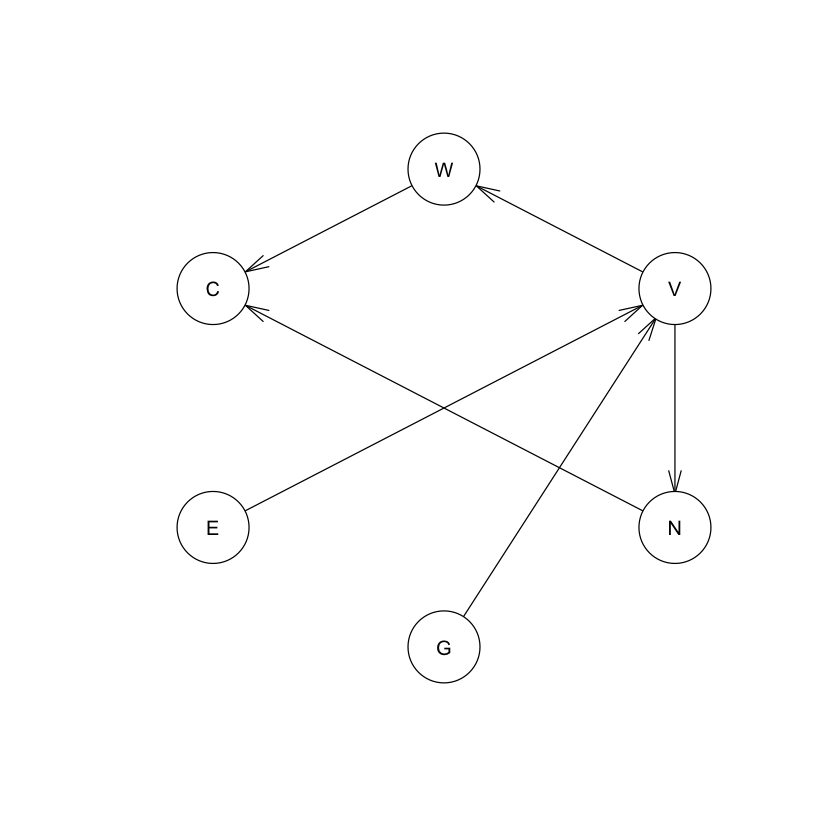

In [1]:
library(bnlearn)
library(graph)

# Specify the BN (from formula --> graph)
dag.bnlearn <- model2network("[G][E][V|G:E][N|V][W|V][C|N:W]")
dag.bnlearn

plot(dag.bnlearn)

In [ ]:
# Pull out all of the inpendencies in the graph 
node_set <- nodes(dag.bnlearn)
node_set

for (n1 in node_set){
    for (n2 in node_set){
        test <- dsep(dag.bnlearn, n1, n2)
        if (test == TRUE){
            cat(n1, "and", n2, "are independent. \n")
        }     
    }
}


In [ ]:
# Now we have information about "V"
dsep(dag.bnlearn, "V", "V")

# Pull out all of the inpendencies in the graph 
node_set <- nodes(dag.bnlearn)
node_set

for (n1 in node_set[node_set != "V"]){
    for (n2 in node_set[node_set != "V"]){
        test <- dsep(dag.bnlearn, x=n1, y=n2, z="V")
        if (test == TRUE){
            cat(n1, "and", n2, "are independent given V. \n")
        }     
    }
}


# Second way of construction
elim <- c("W", "N")
node_set <- setdiff(node_set, elim) # take out of the set 
                                    # that we are considering
node_set

store <- c()
for (n1 in node_set){
    for (n2 in node_set){
        test <- dsep(dag.bnlearn, x = n1, y = n2, z = elim)
        if(test == TRUE){
           cat(n1, "and", n2, "are independent given W and N. \n")
           temp <- c(n1, n2)
           store <- rbind(store, temp) 
        }
    }
}


rownames(store) <- NULL
colnames(store) <- c("n1", "n2")
store